# Data Science Intern @LGMVIP July, 2022

## Beginner Level Task - 01

## Title : IRIS Flower Classification ML Project

In [212]:
# Importing all the required libraries

import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [213]:
# Loading the Dataset

df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [214]:
# Finding the shape of the Dataset

df.shape

(150, 6)

In [215]:
# Getting the Overall Information of the Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [216]:
# Checking for null values in the Dataset

df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [217]:
# Counting the Unique Values in the Species Column

df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

## Graphical Representation of the Features in the Dataset

<AxesSubplot:title={'center':'Count-Plot for the 3 different Species of Flowers'}, xlabel='Species', ylabel='count'>

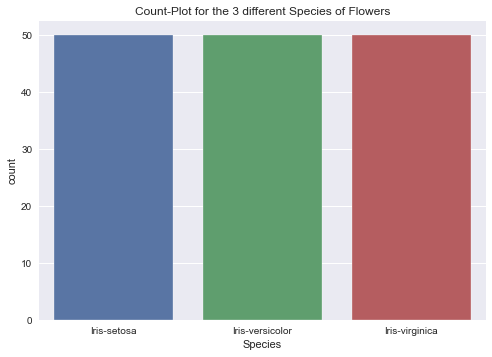

In [218]:
# Representing the Frequncy Plot for the Species Column

plt.title('Count-Plot for the 3 different Species of Flowers')
sns.countplot(x=df['Species'])

(array([41.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <BarContainer object of 10 artists>)

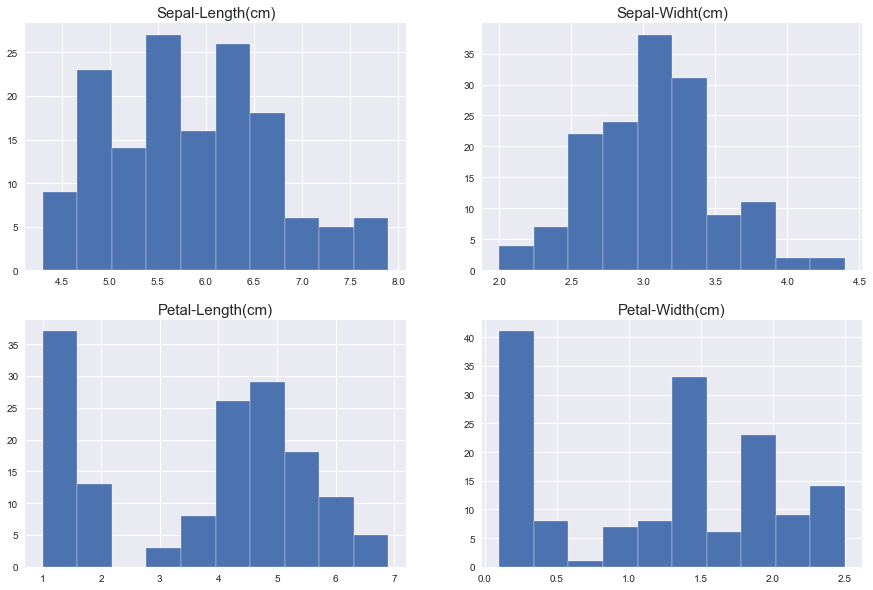

In [219]:
# Histogram Plot for the Flower Features (Sepal and Petal Length, and Sepal and Petal Width)

plt.subplots(figsize=(15, 10))

plt.subplot(2,2,1)
plt.title('Sepal-Length(cm)',fontsize=15)
plt.hist(df['SepalLengthCm'])

plt.subplot(2,2,2)
plt.title('Sepal-Widht(cm)', fontsize=15)
plt.hist(df['SepalWidthCm'])

plt.subplot(2,2,3)
plt.title('Petal-Length(cm)', fontsize=15)
plt.hist(df['PetalLengthCm'])

plt.subplot(2,2,4)
plt.title('Petal-Width(cm)', fontsize=15)
plt.hist(df['PetalWidthCm'])

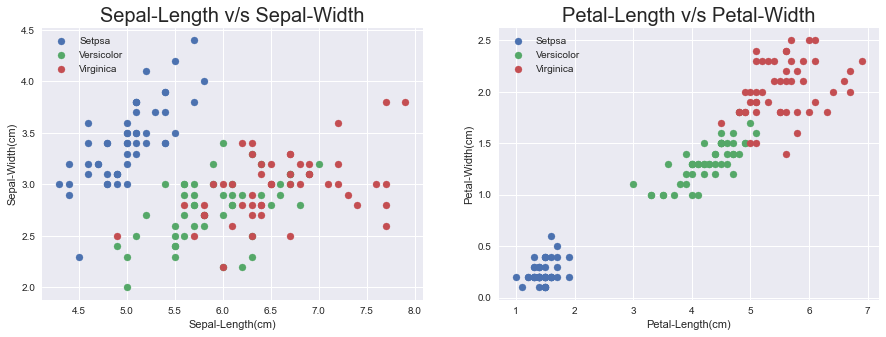

In [220]:
# Scatter Plot for the Flower Features (Sepal and Petal Length, and Sepal and Petal Width)

plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Sepal-Length v/s Sepal-Width',fontsize=20)

plt.scatter('SepalLengthCm', 'SepalWidthCm', data = df[df['Species']=='Iris-setosa'], label='Setpsa')
plt.scatter('SepalLengthCm', 'SepalWidthCm', data = df[df['Species']=='Iris-versicolor'], label='Versicolor')
plt.scatter('SepalLengthCm', 'SepalWidthCm', data = df[df['Species']=='Iris-virginica'], label='Virginica')

plt.xlabel('Sepal-Length(cm)')
plt.ylabel('Sepal-Width(cm)')
plt.legend(loc=2)

plt.subplot(1,2,2)
plt.title('Petal-Length v/s Petal-Width',fontsize=20)

plt.scatter('PetalLengthCm', 'PetalWidthCm', data = df[df['Species']=='Iris-setosa'], label='Setpsa')
plt.scatter('PetalLengthCm', 'PetalWidthCm', data = df[df['Species']=='Iris-versicolor'], label='Versicolor')
plt.scatter('PetalLengthCm', 'PetalWidthCm', data = df[df['Species']=='Iris-virginica'], label='Virginica')

plt.xlabel('Petal-Length(cm)')
plt.ylabel('Petal-Width(cm)')
plt.legend(loc=2)

## Building of the Classification Model

### Encoding the Species Feature using LabelEncoder using sklearn.preprocessing

In [221]:
df['Encoded_Species']= le.fit_transform(df['Species'])

print(df['Encoded_Species'].value_counts())

df

0    50
1    50
2    50
Name: Encoded_Species, dtype: int64


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Encoded_Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


### Splitting the Dataset into Train and Test Data

In [222]:
x = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df[['Encoded_Species']]

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

### Training the Model using Logistic Regression

In [ ]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

In [224]:
a = log_reg.predict(X_test)
species = ['Setosa', 'Versicolor', 'Virginica']
predict_species = []

for i in a:
    predict_species.append(species[i])

print(f"Label Encoded Prediction of Species: {a} \n")
print(f"Species Names: {predict_species}")

Label Encoded Prediction of Species: [0 1 1 0 1 1 1 2 1 0 1 0 0 2 2 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 2 1 1 0 2 1 2
 0 2 2 0 2 2 2 1] 

Species Names: ['Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor', 'Virginica', 'Versicolor', 'Setosa', 'Versicolor', 'Setosa', 'Setosa', 'Virginica', 'Virginica', 'Versicolor', 'Versicolor', 'Setosa', 'Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor', 'Setosa', 'Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Virginica', 'Setosa', 'Virginica', 'Virginica', 'Setosa', 'Virginica', 'Virginica', 'Virginica', 'Versicolor']


In [225]:
# Accuracy Score for the Logistic regression Model

log_reg.score(X_test, y_test)

0.9333333333333333

### Training the Model using Support Vector Machine Classifier (SVMC)

In [ ]:
svc = SVC()

svc.fit(X_train, y_train)

In [227]:
a = svc.predict(X_test)
species = ['Setosa', 'Versicolor', 'Virginica']
predict_species = []

for i in a:
    predict_species.append(species[i])

print(f"Label Encoded Prediction of Species: {a} \n")
print(f"Species Names: {predict_species}")

Label Encoded Prediction of Species: [0 1 1 0 1 1 1 2 1 0 1 0 0 2 2 1 1 0 0 0 1 1 1 0 1 2 1 0 1 0 2 1 1 0 2 1 2
 0 2 2 0 2 2 2 1] 

Species Names: ['Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor', 'Virginica', 'Versicolor', 'Setosa', 'Versicolor', 'Setosa', 'Setosa', 'Virginica', 'Virginica', 'Versicolor', 'Versicolor', 'Setosa', 'Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor', 'Setosa', 'Versicolor', 'Virginica', 'Versicolor', 'Setosa', 'Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Virginica', 'Setosa', 'Virginica', 'Virginica', 'Setosa', 'Virginica', 'Virginica', 'Virginica', 'Versicolor']


In [228]:
# Accuracy Score for the Support Vector Machine Classifier Model

svc.score(X_test, y_test)

0.9555555555555556